#  Bike Sharing Demand – Exploratory Data Analysis (EDA)

## Objective
- Understand the distribution of the target variable
- Analyze temporal patterns
- Explore relationships between features and target
- Identify potential data leakage and non-linearities


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = "../../datasets/bike_sharing/train.csv"
train_df = pd.read_csv(train_path)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


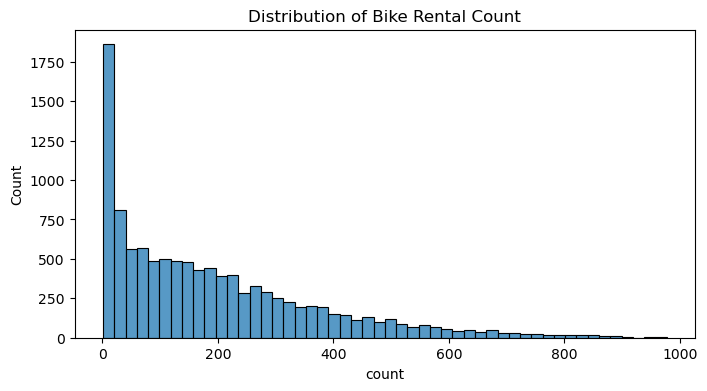

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df["count"],bins=50)
plt.title("Distribution of Bike Rental Count")
plt.show()

In [10]:
train_df["count"].skew()

np.float64(1.2420662117180776)

## Time feature extraction

In [27]:
train_df["datetime"]=pd.to_datetime(train_df["datetime"])
train_df["hour"]=train_df["datetime"].dt.hour
train_df["month"]=train_df["datetime"].dt.month
train_df["weekday"]=train_df["datetime"].dt.weekday

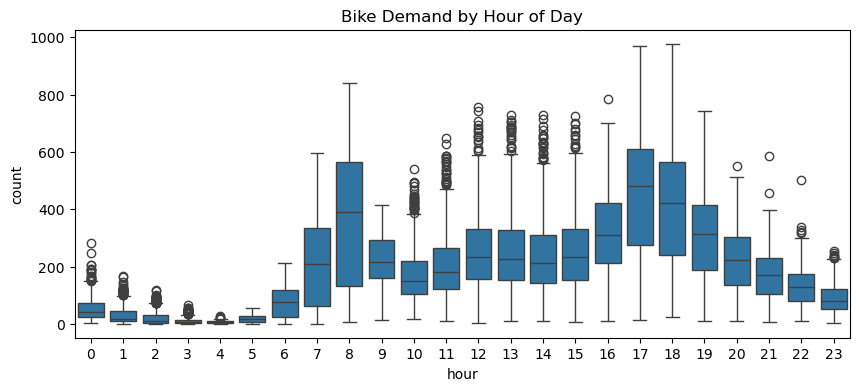

In [24]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="hour", y="count", data=train_df)
plt.title("Bike Demand by Hour of Day")
plt.show()


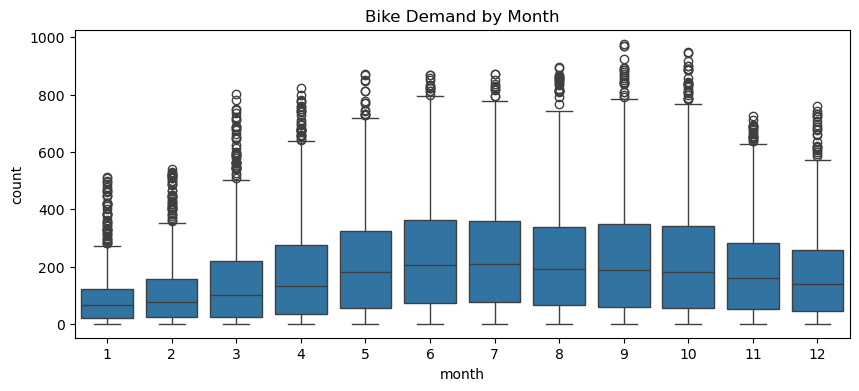

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="month", y="count", data=train_df)
plt.title("Bike Demand by Month")
plt.show()


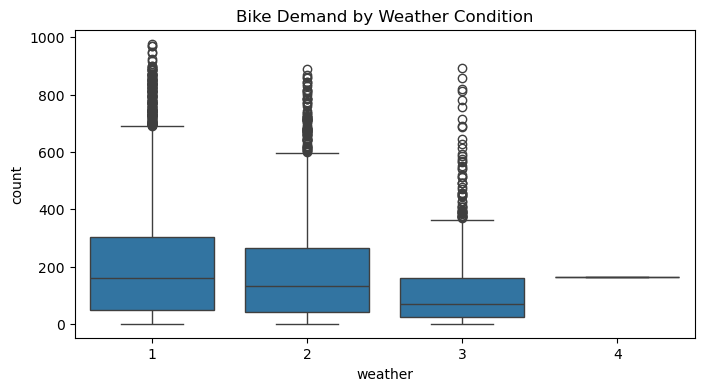

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="weather", y="count", data=train_df)
plt.title("Bike Demand by Weather Condition")
plt.show()


In [28]:
##Leakage Check
train_df[["casual", "registered", "count"]].head()


,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


# Key Observations

- Target variable is right-skewed
- Strong hourly and monthly patterns
- Clear non-linear relationships
- Weather has a strong effect on demand
- `casual` and `registered` are components of the target → leakage risk
